### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
import numpy as np

nombres = ['tienda1', 'tienda2','tienda3','tienda4']
def facturacion(tienda):
  precios = sum(tienda['Precio'])
  return precios


facturaciones = []
facturacion_tienda = [facturacion(tienda1), facturacion(tienda2), facturacion(tienda3), facturacion(tienda4)]
facturacion_total = sum(facturacion_tienda)
facturacion_max = max(facturacion_tienda)
max_index = np.argmax(facturacion_tienda)

facturaciones = list(zip(nombres, facturacion_tienda))

texto ='Analisis de facturacón:\n'
for i in range(len(facturaciones)):
  texto += f'La {facturaciones[i][0]} facturó la cantidad de ${facturaciones[i][1]:,}\n'

print(texto)

print(f'La {facturaciones[max_index][0]} fue la que mas facturó por la cantidad de ${facturacion_max:,}  \n')


Analisis de facturacón:
La tienda1 facturó la cantidad de $1,150,880,400.0
La tienda2 facturó la cantidad de $1,116,343,500.0
La tienda3 facturó la cantidad de $1,098,019,600.0
La tienda4 facturó la cantidad de $1,038,375,700.0

La tienda1 fue la que mas facturó por la cantidad de $1,150,880,400.0  



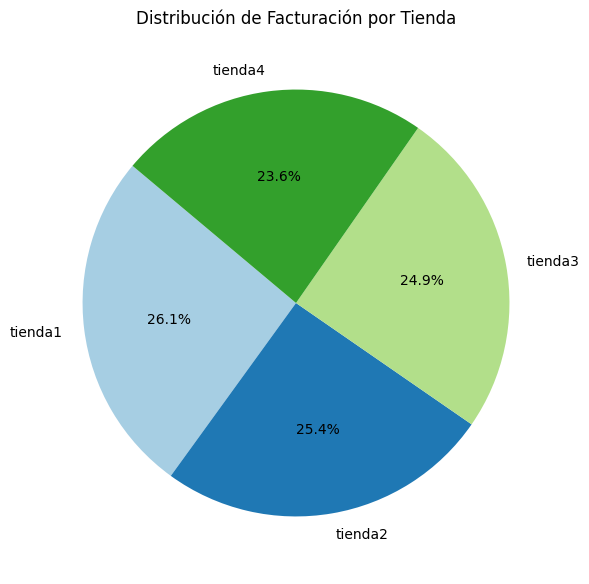

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#  Gráfico tipo pie
plt.figure(figsize=(6, 6))
plt.pie(
    facturacion_tienda,
    labels=nombres,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Distribución de Facturación por Tienda")
plt.axis('equal')  # Mantiene el círculo
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
import pandas as pd
def obtiene_categorias(tienda):
  categorias_unicas = list(zip(tienda["Categoría del Producto"].unique(), tienda["Categoría del Producto"].value_counts()))
  return categorias_unicas

texto ='Ventas por categoría:\n'
print(texto)
categorias = []
categorias_tienda = [obtiene_categorias(tienda1), obtiene_categorias(tienda2), obtiene_categorias(tienda3), obtiene_categorias(tienda4)]
categorias = list(zip(nombres, categorias_tienda))

for i in range(len(categorias)):
  texto = f'La {categorias[i][0]} vendió las siguientes categorías:'
  print(texto)
  categoria, cantidad  = list(zip(*categorias[i][1]))
  for j in range(len(categoria)):
    print(f'{categoria[j]} : {cantidad[j]},')
  print('\n')


Ventas por categoría:

La tienda1 vendió las siguientes categorías:
Electrónicos : 465,
Muebles : 448,
Juguetes : 324,
Electrodomésticos : 312,
Artículos para el hogar : 284,
Deportes y diversión : 182,
Libros : 173,
Instrumentos musicales : 171,


La tienda2 vendió las siguientes categorías:
Muebles : 442,
Instrumentos musicales : 422,
Deportes y diversión : 313,
Electrónicos : 305,
Artículos para el hogar : 275,
Juguetes : 224,
Electrodomésticos : 197,
Libros : 181,


La tienda3 vendió las siguientes categorías:
Electrodomésticos : 499,
Muebles : 451,
Instrumentos musicales : 315,
Deportes y diversión : 278,
Electrónicos : 277,
Juguetes : 185,
Artículos para el hogar : 177,
Libros : 177,


La tienda4 vendió las siguientes categorías:
Electrodomésticos : 480,
Muebles : 451,
Deportes y diversión : 338,
Libros : 277,
Electrónicos : 254,
Instrumentos musicales : 201,
Juguetes : 187,
Artículos para el hogar : 170,




# 3. Calificación promedio de la tienda


In [ ]:
import numpy as np

def suma_califi(tienda):
  res = sum(tienda['Calificación'])/len(tienda)
  return res


calificaciones = []
calificaciones_tienda = [suma_califi(tienda1), suma_califi(tienda2), suma_califi(tienda3), suma_califi(tienda4)]
max_index = np.argmax(calificaciones_tienda)
facturacion_max = max(calificaciones_tienda)
max_index = np.argmax(calificaciones_tienda)


calificaciones = list(zip(nombres, calificaciones_tienda))

texto ='Analisis de calificaciones:\n'
for i in range(len(calificaciones)):
  texto += f'La {calificaciones[i][0]} fase calificaó en promedio con {calificaciones[i][1]}\n'

print(texto)

print(f'La {calificaciones[max_index][0]} fue la que tuvó una mejor calificacion %.3f \n'% facturacion_max)

Analisis de calificaciones:
La tienda1 fase calificaó en promedio con 3.976685036032217
La tienda2 fase calificaó en promedio con 4.037303942348453
La tienda3 fase calificaó en promedio con 4.048325561678677
La tienda4 fase calificaó en promedio con 3.9957591178965224

La tienda3 fue la que tuvó una mejor calificacion 4.048 



# 4. Productos más y menos vendidos

In [ ]:
import pandas as pd
import numpy as np
def obtiene_productos(tienda):
  arreglo_producto_cantidad = [[producto, cantidad] for producto, cantidad in tienda["Producto"].value_counts().items()]
  return arreglo_producto_cantidad


texto =' Productos más y menos vendidos:\n'
print(texto)
productos = []
productos_tienda = [obtiene_productos(tienda1), obtiene_productos(tienda2), obtiene_productos(tienda3), obtiene_productos(tienda4)]

productos = list(zip(nombres, productos_tienda))

for i in range(len(productos)):
  texto = f'La {productos[i][0]} vendió las siguientes productos:'
  print(texto)
  for j in range(len(productos[i][1])):
    print(f'{productos[i][1][j][0]} : {productos[i][1][j][1]}')
  print('\n')


 Productos más y menos vendidos:

La tienda1 vendió las siguientes productos:
Microondas : 60
TV LED UHD 4K : 60
Armario : 60
Secadora de ropa : 58
Mesa de noche : 56
Bloques de construcción : 56
Balón de baloncesto : 55
Bicicleta : 54
Vaso térmico : 54
Refrigerador : 54
Impresora : 54
Batería : 53
Cubertería : 52
Carrito de control remoto : 52
Modelado predictivo : 51
Auriculares : 50
Ajedrez de madera : 49
Iphone 15 : 49
Lavavajillas : 48
Lavadora de ropa : 47
Guitarra eléctrica : 47
Guitarra acústica : 46
Sofá reclinable : 46
Silla de oficina : 46
Estufa : 45
Cama box : 44
Kit de bancas : 44
Smart TV : 44
Cama king : 44
Cubo mágico 8x8 : 44
Mesa de centro : 44
Set de ollas : 43
Smartwatch : 43
Juego de mesa : 43
Balón de voleibol : 42
Dashboards con Power BI : 42
Tablet ABXY : 42
Sillón : 41
Iniciando en programación : 41
Set de vasos : 41
Asistente virtual : 40
Muñeca bebé : 40
Mesa de comedor : 40
Dinosaurio Rex : 40
Cuerda para saltar : 40
Mochila : 39
Ciencia de datos con Python

La tienda1 tuvo las siguientes ventas:


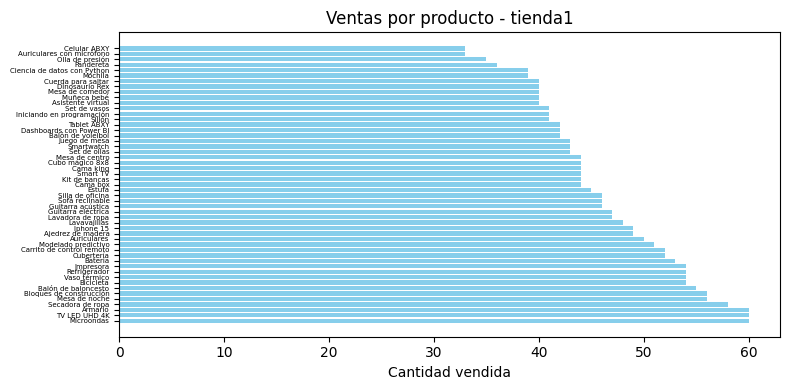

La tienda2 tuvo las siguientes ventas:


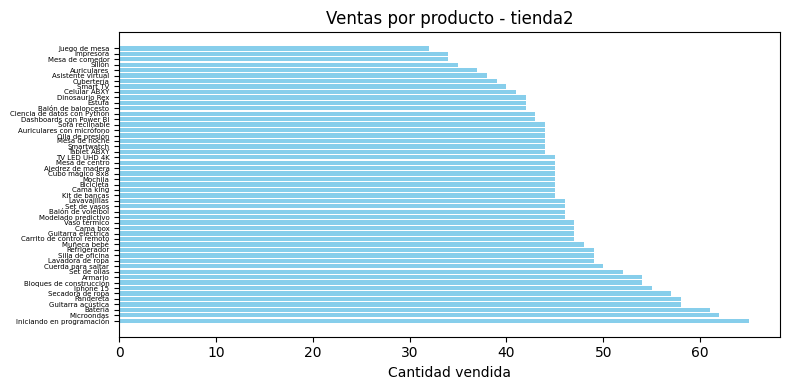

La tienda3 tuvo las siguientes ventas:


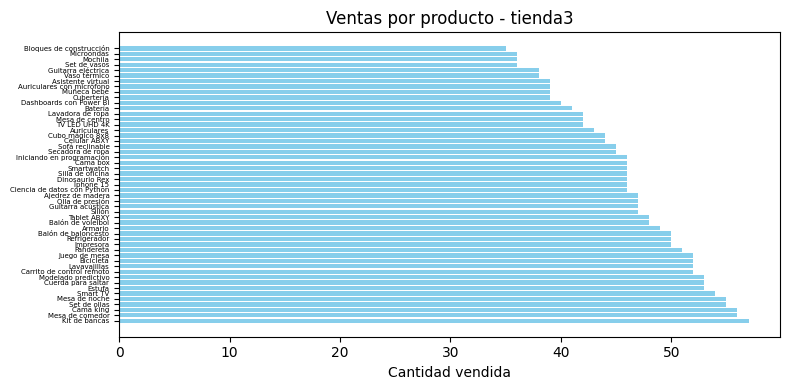

La tienda4 tuvo las siguientes ventas:


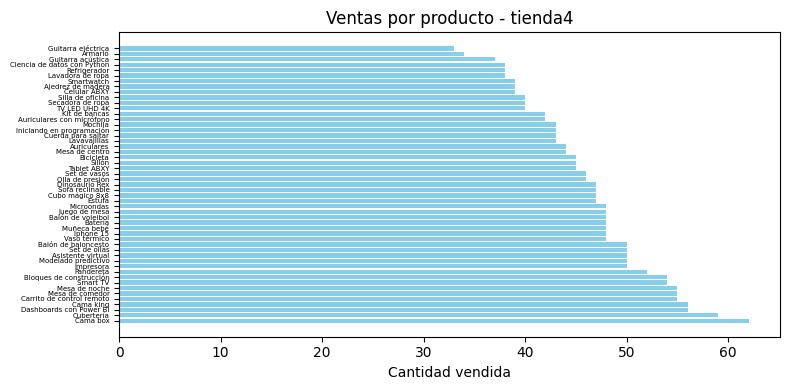

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mostrar texto y gráficos
for i in range(len(productos)):
    nombre_tienda = productos[i][0]
    lista_productos = productos[i][1]

    print(f'La {nombre_tienda} tuvo las siguientes ventas:')
    # Preparar datos para el gráfico
    nombres_productos = [p[0] for p in lista_productos]
    cantidades = [p[1] for p in lista_productos]

    # Graficar
    plt.figure(figsize=(8, 4))
    plt.barh(nombres_productos, cantidades, color='skyblue')
    plt.xlabel("Cantidad vendida")
    plt.title(f"Ventas por producto - {nombre_tienda}")
    plt.yticks(fontsize=5)
    plt.tight_layout()
    plt.show()


# 5. Envío promedio por tienda

In [ ]:
import numpy as np

def suma_costo_envio(tienda):
  res = sum(tienda['Costo de envío'])/len(tienda)
  return res


promedios = []
costo_envio_tienda = [suma_costo_envio(tienda1), suma_costo_envio(tienda2), suma_costo_envio(tienda3), suma_costo_envio(tienda4)]


promedios = list(zip(nombres, costo_envio_tienda))

texto ='Envío promedio por tienda:\n'
for i in range(len(promedios)):
  print( f'La {promedios[i][0]} tuvo un costo de envio promedio de %.f'% promedios[i][1])


La tienda1 tuvo un costo de envio promedio de 26019
La tienda2 tuvo un costo de envio promedio de 25216
La tienda3 tuvo un costo de envio promedio de 24806
La tienda4 tuvo un costo de envio promedio de 23459


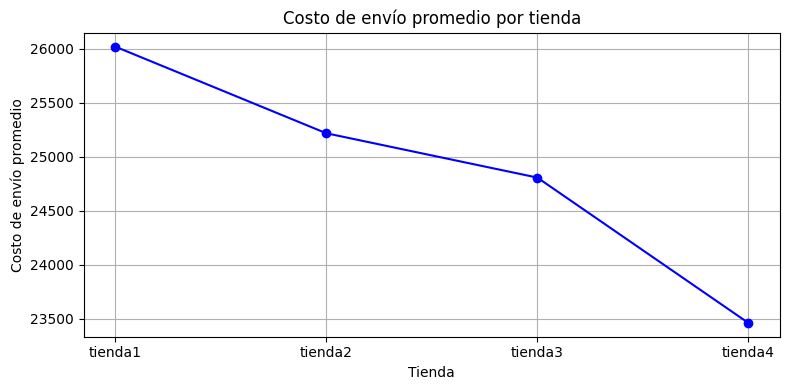

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4))
plt.plot(nombres, calificaciones_tienda, marker='o', linestyle='-', color='blue')
plt.title('Costo de envío promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

📊 Informe Final de Análisis de Tiendas para Venta del Sr. Juan
Introducción
El propósito de este análisis es identificar la tienda más conveniente para que el Sr. Juan comercialice sus productos. Para ello, se analizaron y compararon cuatro tiendas con base en cinco criterios fundamentales: ingresos totales, productos más y menos vendidos, categorías preferidas, calificaciones de los clientes y el costo de envío promedio. A partir de estos indicadores, se busca tomar una decisión informada y estratégica que favorezca las ventas y la satisfacción del cliente.

Desarrollo del análisis
🏦 Ingresos totales
Se evaluó la facturación total de cada tienda mediante un gráfico tipo pastel. La tienda con mayores ingresos fue Tienda 1, representando aproximadamente 26.1% de la facturación total. Esto indica un alto volumen de ventas o productos de mayor precio, lo cual es un buen indicio de demanda activa.

Visualización: Gráfico pie de facturación total

🧸 Productos más y menos vendidos
Cada tienda muestra diferentes tendencias en cuanto a los productos más solicitados. Algunas tiendas tienen una mayor concentración de ventas en productos específicos, mientras que otras distribuyen sus ventas de forma más equilibrada. El producto  Cama box fue consistentemente populare, mientras que la Guitarra electrica casi no se vendió.

Visualización: Gráfico de barras horizontales por tienda

🗂️ Categorías más y menos vendidas
En general, la categoría de Muebles fue la más vendida en la mayoría de las tiendas, seguida de Electrodomésticos. Esto puede indicar una mayor demanda o preferencia del público por ciertos tipos de productos, lo cual debe tenerse en cuenta para alinear la oferta del Sr. Juan con las expectativas del cliente.

🌟 Calificaciones promedio
Se calcularon las calificaciones promedio otorgadas por los clientes. Tienda 3 obtuvo la mayor calificación con un promedio de 4.048 sobre 5, lo cual sugiere una experiencia de compra más satisfactoria. Este factor es clave para la reputación del vendedor y la fidelización del cliente.

🚚 Costo de envío promedio
El análisis del costo de envío reveló diferencias significativas entre tiendas. Tienda 3 ofrece los envíos más económicos (promedio de $23459), lo cual podría incentivar más compras. En contraste, tiendas con envíos más costosos pueden disuadir al cliente o reducir el margen de ganancia del Sr. Juan.

Visualización: Gráfico de líneas comparando costo de envío y facturación

Conclusión y recomendación
Tras evaluar los ingresos, las categorías más vendidas, las calificaciones de los clientes, los productos más solicitados y el costo de envío, recomendamos que el Sr. Juan venda sus productos en la Tienda 1.

Esta tienda se destaca por:

Tener los mayores ingresos, lo que sugiere un flujo constante de clientes.
Mantener una calificación alta, reflejo de buena experiencia del cliente.
Poseer un costo de envío razonable, lo cual favorece las decisiones de compra.
Contar con productos y categorías alineadas a lo que el Sr. Juan podría ofrecer.

Aunque otras tiendas presentan fortalezas en áreas específicas, Tienda 1 muestra el mejor balance general entre volumen de ventas, eficiencia en costos y satisfacción del cliente, lo que maximiza las probabilidades de éxito comercial.

Por otro lado la tienda 4 es la que tiene un desempeño mas bajo, aunque los costos de envio son los menores tambien lo son los ingresos y la cantidad de productos que se vendieron, por lo que se recomienda venderla.